# Los datos

## Carga de datos y descripción

In [1]:
import pandas as pd

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/datos0.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644385
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


Información de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   habitantes      50 non-null     int64  
 1   ingresos        50 non-null     int64  
 2   analfabetismo   50 non-null     float64
 3   esp_vida        50 non-null     float64
 4   asesinatos      50 non-null     float64
 5   universitarios  50 non-null     float64
 6   heladas         50 non-null     int64  
 7   area            50 non-null     int64  
 8   densidad_pobl   50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


Descripción de los datos

In [5]:
df.describe()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000,149.224473
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622,221.006340
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,0.644385
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000,25.335165
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,73.015433
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000,144.282783
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,975.003324


In [6]:
df.isna().sum().sort_values()

habitantes        0
ingresos          0
analfabetismo     0
esp_vida          0
asesinatos        0
universitarios    0
heladas           0
area              0
densidad_pobl     0
dtype: int64

## Análisis gráfico y correlación

Relación gráfica

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

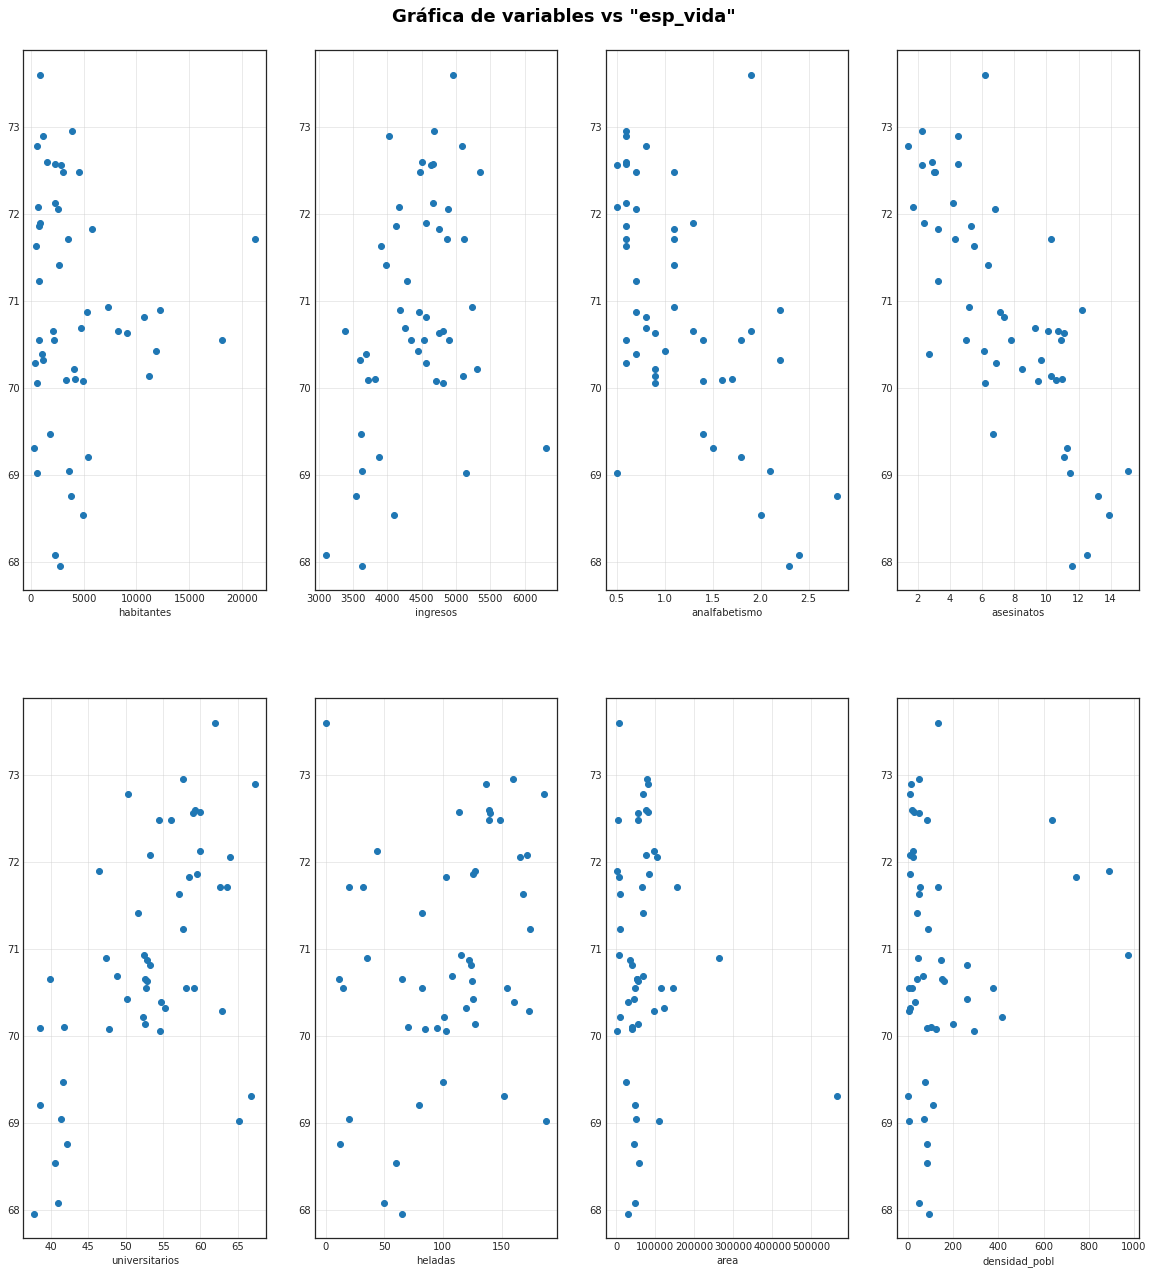

In [8]:
columns_names_list = list(df.columns.values)
columns_names_list.remove('esp_vida')

i = 0

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))
    
    for a in columns_names_list:
        plt.subplot(2, 4, i+1)
        plt.scatter(df[[columns_names_list[i]]], df[['esp_vida']])
    #    plt.title('Gráfica entre variables')
        plt.xlabel(columns_names_list[i])
        plt.ylabel('')
        plt.grid(True, alpha = 0.5);
        i += 1

plt.subplots_adjust(top=0.95)
fig.suptitle('Gráfica de variables vs "esp_vida"', fontsize = 18, fontweight = "bold");
plt.show()

Correlación entre variables

In [9]:
corr_matrix = df.corr()
corr_matrix['esp_vida'].sort_values(ascending=False)

esp_vida          1.000000
universitarios    0.582216
ingresos          0.340255
heladas           0.262068
densidad_pobl     0.091062
habitantes       -0.068052
area             -0.107332
analfabetismo    -0.588478
asesinatos       -0.780846
Name: esp_vida, dtype: float64

Correlación como mapa de calor

In [10]:
import numpy as np

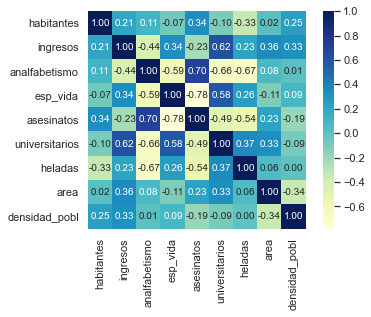

In [11]:
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm
                 ,cmap="YlGnBu"
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 10}
                 ,yticklabels=df.columns
                 ,xticklabels=df.columns)
plt.show()

Correlacion y el histograma

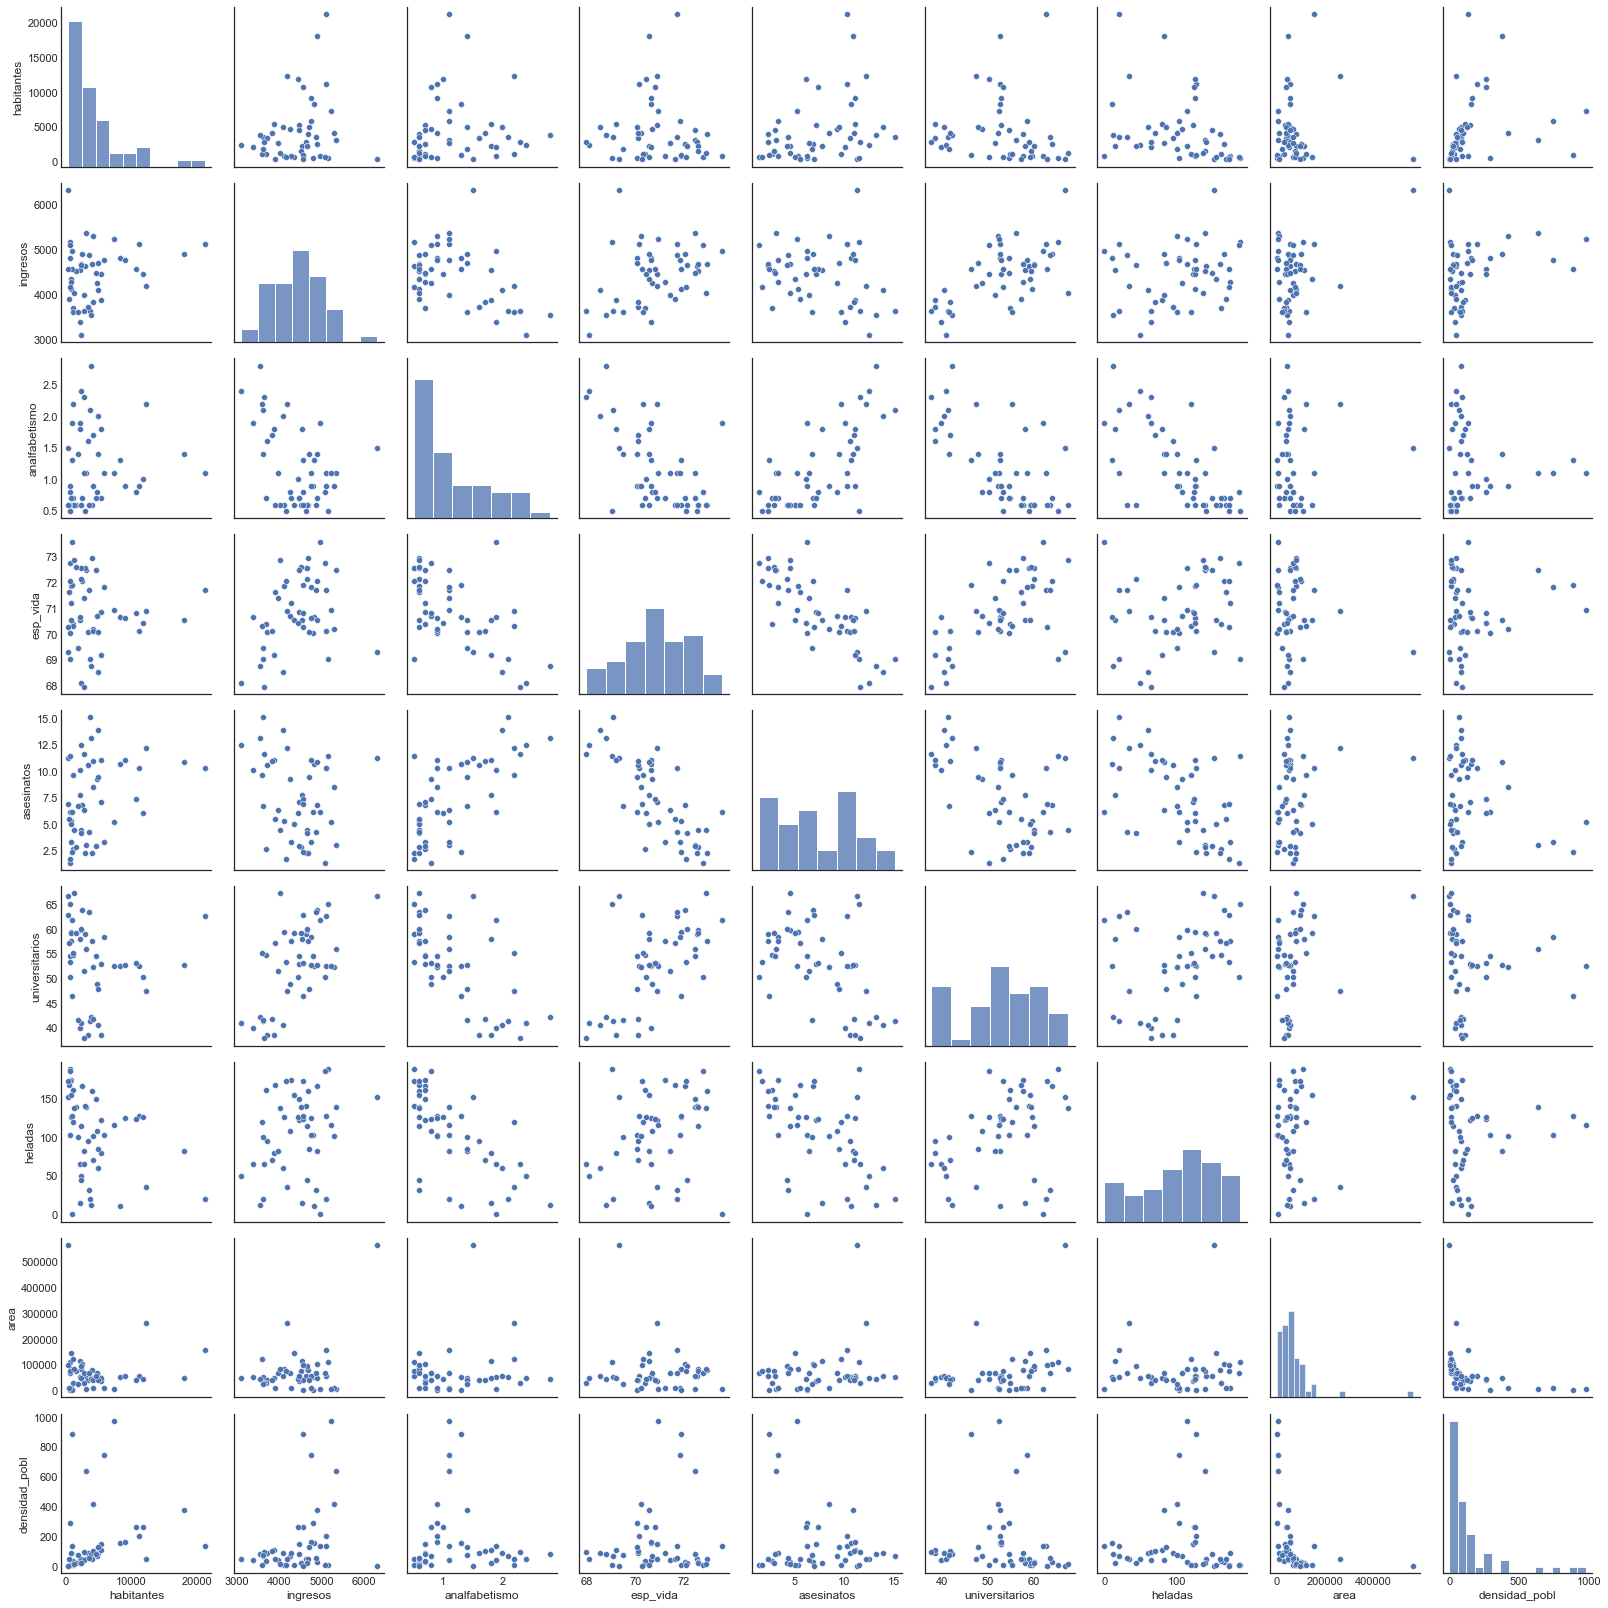

In [12]:
with plt.style.context('seaborn-white'):
    sns.pairplot(df, height=2.5)
    plt.tight_layout()
    plt.grid(True)
plt.show()

## Preparación de datos

In [13]:
# separar variable respuesta del dataset
y = df["esp_vida"].copy()
X = df.drop(["esp_vida"], axis=1)

Creación de conjunto de entrenamiento y de prueba

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.90,
                                        random_state = 42,
                                        shuffle      = False)

# Modelo

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [18]:
import numpy as np

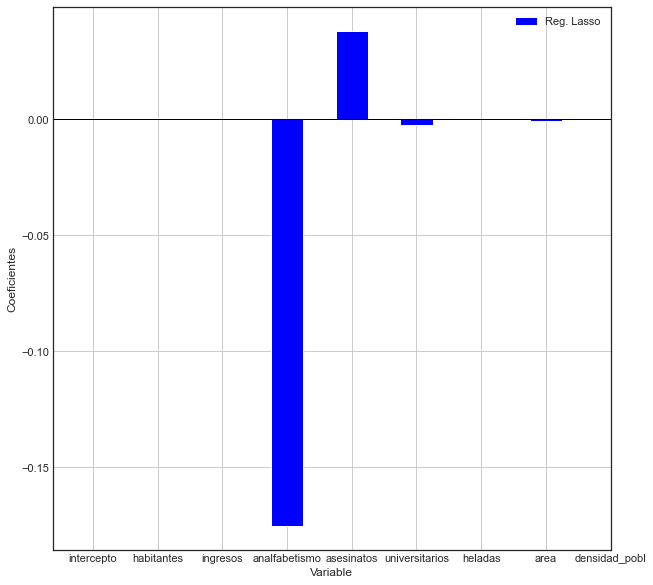

In [19]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10,10))
    # ancho de barra-------------------------------------------------
    barWidth = 0.5
    # definir posicion barras series---------------------------------
    r0 = np.arange(len(lasso_reg.coef_))
    r1 = [x + barWidth for x in r0]
    # pintar las barras----------------------------------------------
    plt.bar(r1, lasso_reg.coef_, color = "blue", width = barWidth, edgecolor = "white", label = "Reg. Lasso")
    plt.xticks([r + barWidth for r in range(9)],
               ['intercepto','habitantes','ingresos','analfabetismo',
                'asesinatos','universitarios','heladas','area','densidad_pobl'])
    plt.axhline(y = 0, linestyle = '-', color = 'black', lw=1)
    plt.legend()
    plt.xlabel("Variable")
    plt.ylabel("Coeficientes")
    plt.grid(True)
plt.show()

## Bondad de ajuste

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
Y_pred = lasso_reg.predict(X_train)
rmse = mean_squared_error(y_train, Y_pred,squared = False)

print(f"El error (rmse) en el conjunto de entrenamiento es: {round(rmse,4)}")

El error (rmse) en el conjunto de entrenamiento es: 0.762


# Análisis de residuos

## Normalidad

In [22]:
residuos_train = y_train - Y_pred

In [23]:
import statsmodels.api as sm

<Figure size 1440x1440 with 0 Axes>

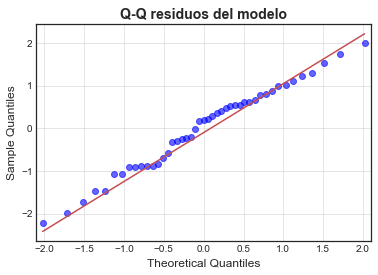

In [24]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))

    sm.qqplot(
        residuos_train,
        fit   = True,
        line  = 'q',
        color = "blue",#'firebrick',
        alpha = 0.6,
        lw    = 2
    )

    plt.title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

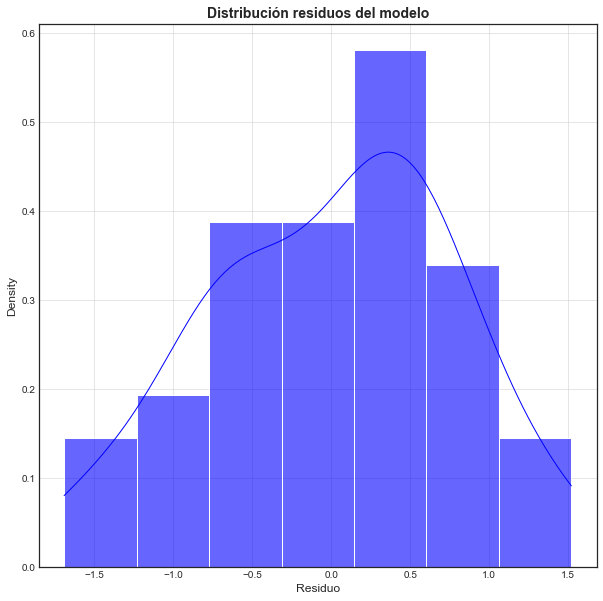

In [25]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",#"firebrick",
        alpha   = 0.6
    )

    plt.title('Distribución residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [26]:
import scipy.stats as stats

In [27]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
k1, p_value = stats.shapiro(residuos_train)
print(f"Shapiro test: Estadístico= {k1}, p-value = {p_value}")

Shapiro test: Estadístico= 0.9803476333618164, p-value = 0.6337862610816956


Test de Shapiro-Wilk

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

In [28]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino's K-squared test: Estadístico= {k2}, p-value = {p_value}")

D'Agostino's K-squared test: Estadístico= 1.2128934323158276, p-value = 0.5452849831312971


Test de D'Agostino's K-cuadrado

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Residuos con media cero

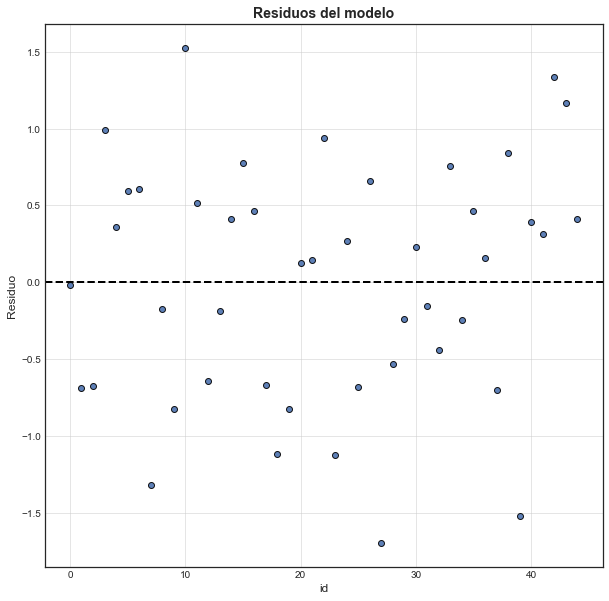

In [29]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('id')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [30]:
med_res = round(np.mean(residuos_train),2)
print(f"La media de los residuos es {med_res}")

La media de los residuos es -0.0


## Homocedasticidad

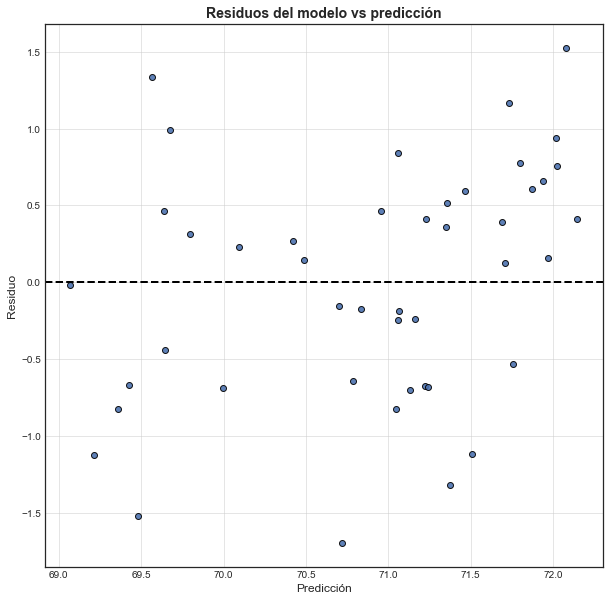

In [31]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(Y_pred, residuos_train, edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo vs predicción', fontsize = 14, fontweight = "bold")
    plt.xlabel('Predicción')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [32]:
import statsmodels.stats.api as sms

In [33]:
p_value = sms.het_breuschpagan(resid = residuos_train, exog_het = X_train)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(p_value))

El resultado del test Breusch-Pagan es: p.valor = 0.002


Test de Breusch-Pagan

$H_0$: La homocedastidad está presente

$H_1$: La heterocedastidad está presente

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Independencia

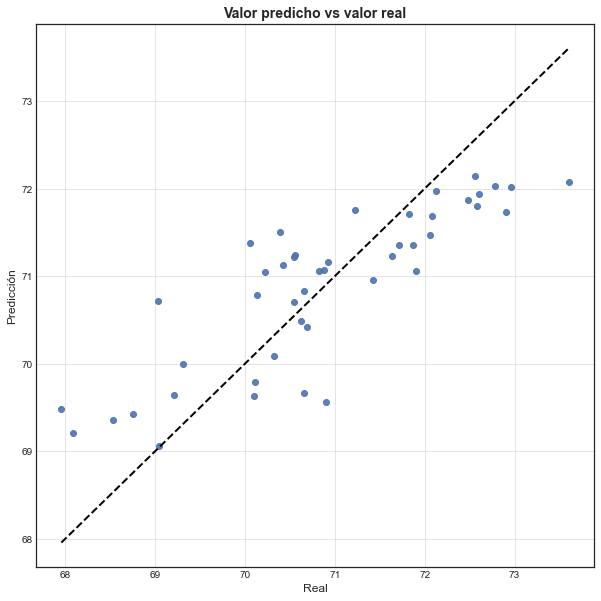

In [34]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, Y_pred, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [35]:
from statsmodels.stats.stattools import durbin_watson

In [36]:
est_dw = round(durbin_watson(residuos_train),2)

print(f"El resultado del test de Durbin-Watson es: Estadístico = {est_dw}")

El resultado del test de Durbin-Watson es: Estadístico = 2.07


Test de Durbin-Watson

$H_0$: Los residuos son independientes

$H_1$: Los residuos no son independientes

El estadístico se encuentra entre 1.5 y 2.5, no se rechaza la hipótesis nula.

# Análisis de outliers y puntos influyentes

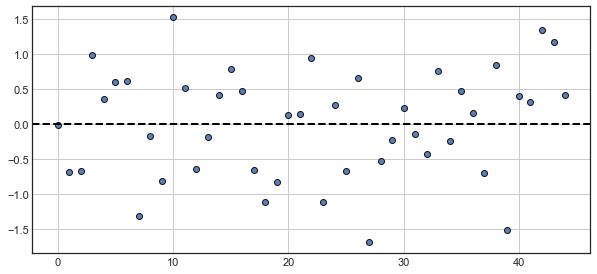

In [37]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(211)
    ax.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    ax.grid()
plt.show()

# Modelo y predicciones

Parámetros del modelo

In [38]:
print('Parámetros: \n', lasso_reg.intercept_)
print('Parámetros: \n', lasso_reg.coef_)
print(X_train.columns)

Parámetros: 
 68.7194572756581
Parámetros: 
 [ 2.00665271e-05  4.45351335e-04 -0.00000000e+00 -1.75290171e-01
  3.80447416e-02 -2.24765109e-03 -3.09929275e-06 -8.59459027e-04]
Index(['habitantes', 'ingresos', 'analfabetismo', 'asesinatos',
       'universitarios', 'heladas', 'area', 'densidad_pobl'],
      dtype='object')


Recta de regresión:

$y = 68.72+2.007e-05*habitantes+4.454e-04*ingresos-1.753e-01*asesinatos+3.805e-02*universitarios-2.248e-03*heladas-3.099e-06*area-8.595e-04*densidadpobl$

Error estándar

Valor de $R^2$

In [39]:
print('El valor de R^2 es:', round(r2_score(y_train, Y_pred),4))

El valor de R^2 es: 0.6817


Estimador de la varianza

In [40]:
y_rest = (y_train - Y_pred)**2
yMLE = sum(y_rest)/(len(y_train))
print("El valor por MLE es:", round(yMLE,4))

El valor por MLE es: 0.5806


In [41]:
yOLS = sum(y_rest)/(len(y_train)-2)
print("El valor por OLS es:", round(yOLS,4))

El valor por OLS es: 0.6076


Predicciones con intervalos de confianza

In [42]:
# seleccionar predictor---------------------------------------------
X1_test = X_test.copy()
# Predicciones---------------------------------------------
Y_pred_test = lasso_reg.predict(X1_test)

Gráfica de predicciones y valores reales

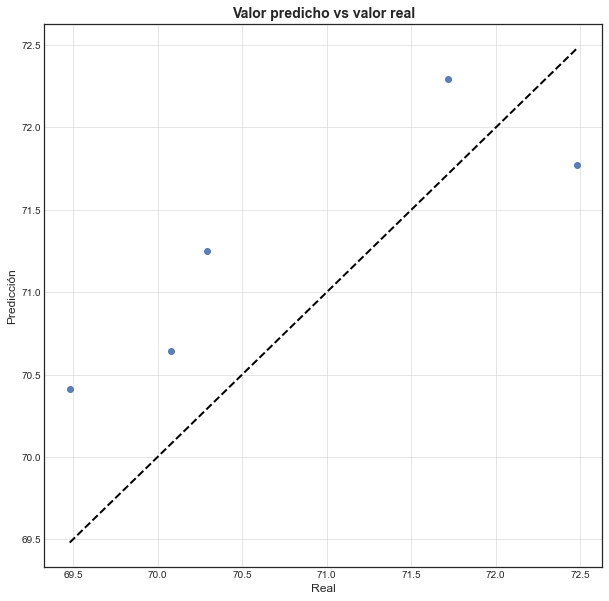

In [43]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_test, Y_pred_test, alpha = 0.9)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

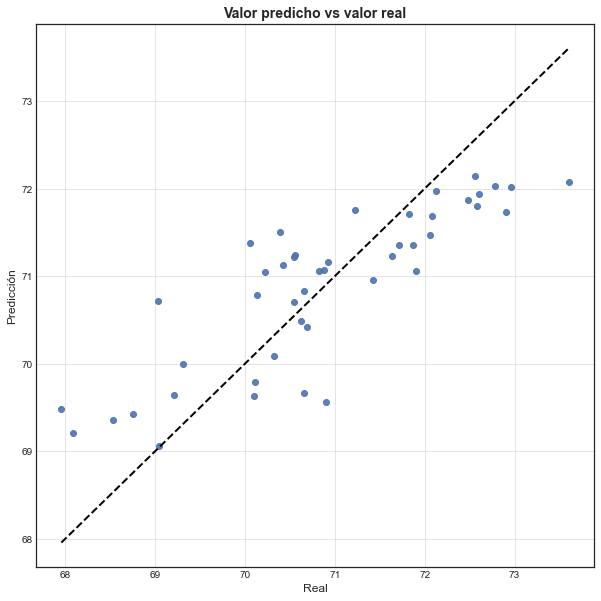

In [44]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, Y_pred, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

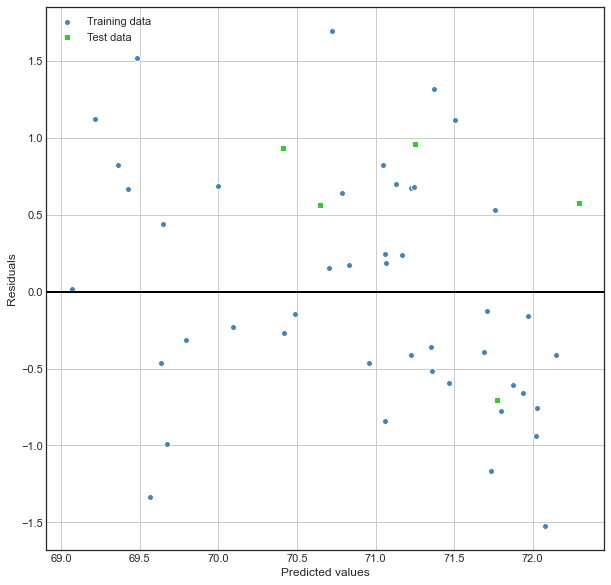

In [45]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(Y_pred, Y_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(Y_pred_test, Y_pred_test - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.axhline(y = 0, linestyle = '-', color = 'black', lw=2)
    plt.grid()
plt.show()

In [46]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, Y_pred),mean_squared_error(y_test, Y_pred_test)))

MSE train: 0.581, test: 0.588


In [47]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, Y_pred),r2_score(y_test, Y_pred_test)))

R^2 train: 0.682, test: 0.525


Elaborado por Jairo Rojas